In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import os


In [ ]:
mu1 = 2
mu2 = -2
sigma = 1

num_samples = 200000

uniform_samples = np.random.rand(num_samples)
samples = np.zeros(num_samples)
samples[uniform_samples < 0.5] = np.random.normal(mu1, sigma, size=np.sum(uniform_samples < 0.5))
samples[uniform_samples >= 0.5] = np.random.normal(mu2, sigma, size=np.sum(uniform_samples >= 0.5))
np.save('mixture_gaussian_samples.npy', samples)
print(f'Saved {num_samples} samples to mixture_gaussian_samples.npy')





Saved 200000 samples to mixture_gaussian_samples.npy


In [3]:
dimension = 128
numIter = 10000
target_name = 'MixedGaussian'
Target, direction = target_MixedGaussian(dimension)
direction[0] = 2
bin_num = 500
realSamples = np.load('mixture_gaussian_samples.npy')
histY, bin_edges_Y = np.histogram(realSamples, bins=bin_num, density=True) # only consider the first coordinate
num_iter = numIter
number_samples_hist = 2000 # int(0.2 * num_iter)
min_number_samples_hist = 1000 # int(0.1 * num_iter)
number_hist = 50
index_hist = np.linspace(number_samples_hist, num_iter, number_hist).astype(int)
def calculate_distances(key, Xsamples):
    if is_constant(key, Xsamples[0,:,:]):
        return np.ones(number_hist) 
    else:
        distances_random = np.zeros(number_hist)
        projected_sample_random = np.matmul(Xsamples, direction/2)

        for i in range(number_hist):
            # print(projected_sample_random[:, min_number_samples_hist:index_hist[i]].reshape(-1,1))
            distances_random[i] = TV_estimation(projected_sample_random[:, min_number_samples_hist:index_hist[i]].reshape(-1,1), histY, bin_edges_Y, bin_num)
        return 0.5 * distances_random

def is_constant(key, Xsamples):
    unique_samples = np.unique(Xsamples, axis=0)
    if unique_samples.shape[0] < 5:
        print(f"{key}: unique_samples is too limited: {unique_samples.shape[0]}")
        return True
    else:
        return False

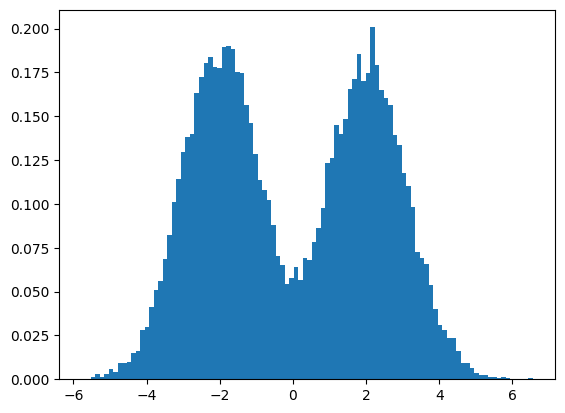

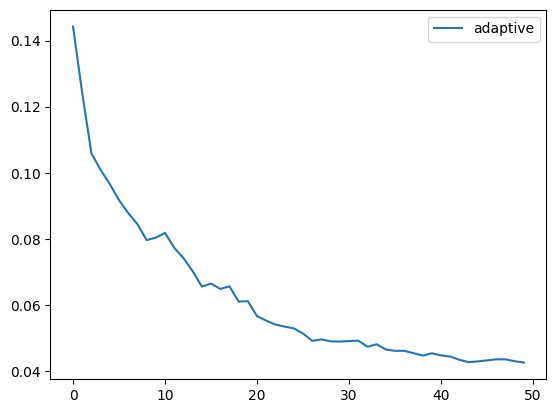

In [4]:
a = np.load('../Adaptive_1_1_128_MixedGaussian.npy')
plt.hist(a[0:3,1000:,0].reshape(-1), density=True, bins=100)
plt.show()
plt.plot(calculate_distances('adaptive',a),label = 'adaptive')
plt.legend()
plt.show()

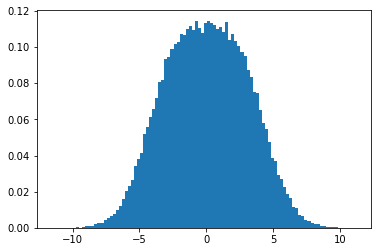

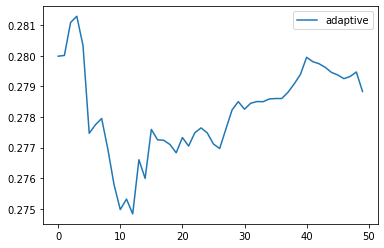

In [51]:
a = np.load('../PS_5_0_128_MixedGaussian.npy')
plt.hist(a[:,1000:,0].reshape(-1), density=True, bins=100)
plt.show()
plt.plot(calculate_distances('adaptive',a),label = 'adaptive')
plt.legend()
plt.show()

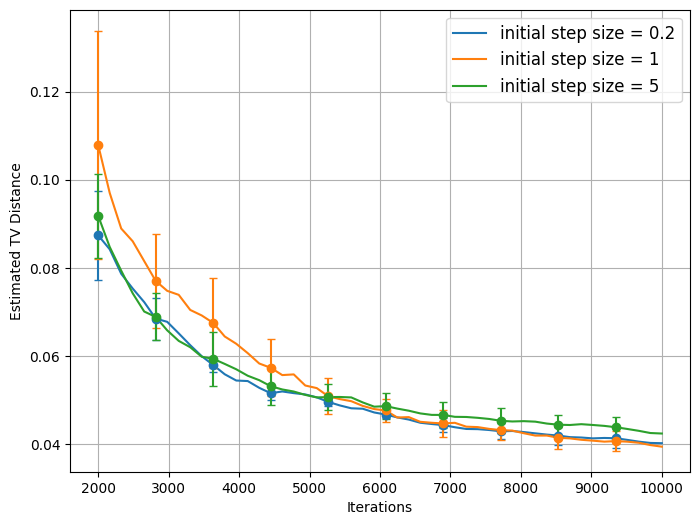

In [12]:

i_values = [0.2, 1, 5]
seeds = [1, 2, 3]

# Initialize a dictionary to store the data for each i
tv_distances = {}

# Load the data and calculate mean and standard deviation for error bars
for i in i_values:
    distances = []
    for seed in seeds:
        a = np.load(f'../Adaptive_{i}_{seed}_128_MixedGaussian.npy')
        tv_distance = calculate_distances('adaptive', a)
        distances.append(tv_distance)
    
    mean_distance = np.mean(distances, axis=0)
    std_distance = np.std(distances, axis=0)
    
    tv_distances[i] = (mean_distance, std_distance)

plt.figure(figsize=(8, 6))

for i in i_values:
    mean_distance, std_distance = tv_distances[i]
    x = np.linspace(number_samples_hist, num_iter, number_hist)
    line, = plt.plot(x, mean_distance, label=f'initial step size = {i}', linestyle='-', marker='None')
    plt.errorbar(x[::5], mean_distance[::5], yerr=std_distance[::5], fmt='o', capsize=3,color=line.get_color())
    
plt.xlabel('Iterations')
plt.ylabel('Estimated TV Distance')
plt.legend(fontsize = 'large')
plt.grid(True)
plt.savefig('adaptive_tv_distance.pdf')
plt.show()

        
        


adaptive: unique_samples is too limited: 1
adaptive: unique_samples is too limited: 1
adaptive: unique_samples is too limited: 1
adaptive: unique_samples is too limited: 1
adaptive: unique_samples is too limited: 1
adaptive: unique_samples is too limited: 1


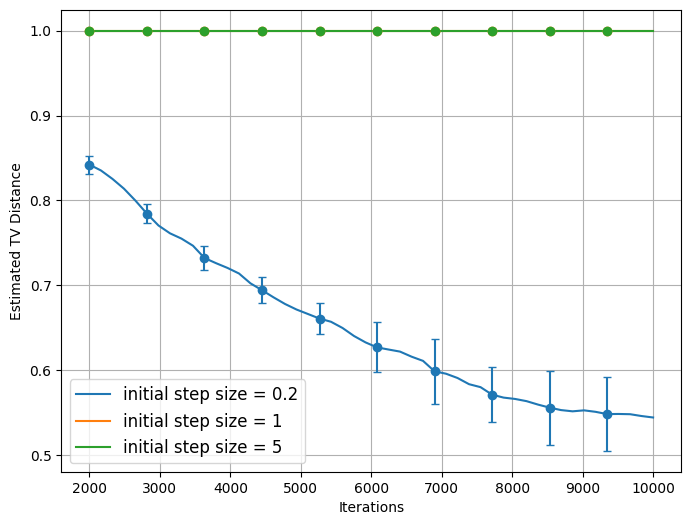

In [13]:
i_values = [0.2, 1, 5]
seeds = [1, 2, 3]

# Initialize a dictionary to store the data for each i
tv_distances = {}

# Load the data and calculate mean and standard deviation for error bars
for i in i_values:
    distances = []
    for seed in seeds:
        a = np.load(f'../MALA_{i}_{seed}_128_MixedGaussian.npy')
        tv_distance = calculate_distances('MALA', a)
        distances.append(tv_distance)
    
    mean_distance = np.mean(distances, axis=0)
    std_distance = np.std(distances, axis=0)
    
    tv_distances[i] = (mean_distance, std_distance)

plt.figure(figsize=(8, 6))

for i in i_values:
    mean_distance, std_distance = tv_distances[i]
    x = np.linspace(number_samples_hist, num_iter, number_hist)
    line, = plt.plot(x, mean_distance, label=f'fixed step size = {i}', linestyle='-', marker='None')
    plt.errorbar(x[::5], mean_distance[::5], yerr=std_distance[::5], fmt='o', capsize=3,color=line.get_color())
    
plt.xlabel('Iterations')
plt.ylabel('Estimated TV Distance')
plt.legend(fontsize = 'large')
plt.grid(True)
plt.savefig('MALA_tv_distance.pdf')
plt.show()

In [ ]:
i_values = [0.2, 1, 5]
seeds = [1, 2, 3]

# Initialize a dictionary to store the data for each i
tv_distances = {}

# Load the data and calculate mean and standard deviation for error bars
for i in i_values:
    distances = []
    for seed in seeds:
        a = np.load(f'../Fixed_{i}_{seed}_128_MixedGaussian.npy')
        tv_distance = calculate_distances('fixed', a)
        distances.append(tv_distance)
    
    mean_distance = np.mean(distances, axis=0)
    std_distance = np.std(distances, axis=0)
    
    tv_distances[i] = (mean_distance, std_distance)

plt.figure(figsize=(8, 6))

for i in i_values:
    mean_distance, std_distance = tv_distances[i]
    x = np.linspace(number_samples_hist, num_iter, number_hist)
    line, = plt.plot(x, mean_distance, label=f'fixed step size = {i}', linestyle='-', marker='None')
    plt.errorbar(x[::5], mean_distance[::5], yerr=std_distance[::5], fmt='o', capsize=3,color=line.get_color())
    
plt.xlabel('Iterations')
plt.ylabel('Estimated TV Distance')
plt.legend(fontsize = 'large')
plt.grid(True)
plt.savefig('Fixed_tv_distance.pdf')
plt.show()